In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import country_converter as coco
import matplotlib.pyplot as plt
import re
import hashlib
from urllib.parse import urlparse

# Archivo CSV
try:
    df = pd.read_csv('ICSSTRIVE.csv')
    print("File loaded successfully")
except FileNotFoundError:
    print("Error: File 'ICSSTRIVE.csv' not found.")
    exit()

# Mostrar las primeras filas del DataFrame
print(df.head())


File loaded successfully
                                data_source_link_url  \
0  https://icsstrive.com/incident/operational-imp...   
1  https://icsstrive.com/incident/framework-lapto...   
2  https://icsstrive.com/incident/clothing-provid...   
3  https://icsstrive.com/incident/hackers-accesse...   
4  https://icsstrive.com/incident/chinese-identif...   

                                         description                date  \
0  ALPS' North American production operations and...  September 10, 2023   
1  San Francisco, California-based Framework, the...     January 9, 2024   
2  After suffering a cyberattack December 13, V.F...   December 13, 2023   
3  Toyota Financial Services (TFS) is warning cus...   December 11, 2023   
4  Chinese hackers are positioning themselves ins...   December 11, 2023   

                    locations  \
0  ['Japan', 'United States']   
1           ['United States']   
2           ['United States']   
3                 ['Germany']   
4           ['Un

In [16]:
# Verificar si la columna 'date' existe para procesarla
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convertir a datetime, NaT si falla

    # Crear las nuevas columnas 'Year', 'Month', 'Day' solo si la conversión fue exitosa
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month
    df['Day'] = df['date'].dt.day

    # Eliminar la columna original 'date'
    df.drop(columns=['date'], inplace=True)

# Verificar si las columnas 'Year', 'Month' y 'Day' existen y mostrarlas
columns_to_check = ['Year', 'Month', 'Day']
existing_columns = [col for col in columns_to_check if col in df.columns]

if existing_columns:
    print("\nDataFrame con las columnas 'Year', 'Month' y 'Day':")
    print(df[existing_columns].head())  # Muestra solo las columnas Year, Month y Day
else:
    print("Las columnas 'Year', 'Month' y 'Day' no están presentes en el DataFrame.")


DataFrame con las columnas 'Year', 'Month' y 'Day':
   Year  Month  Day
0  2023      9   10
1  2024      1    9
2  2023     12   13
3  2023     12   11
4  2023     12   11


N/A not found in ISO3
Unknown Country not found in regex


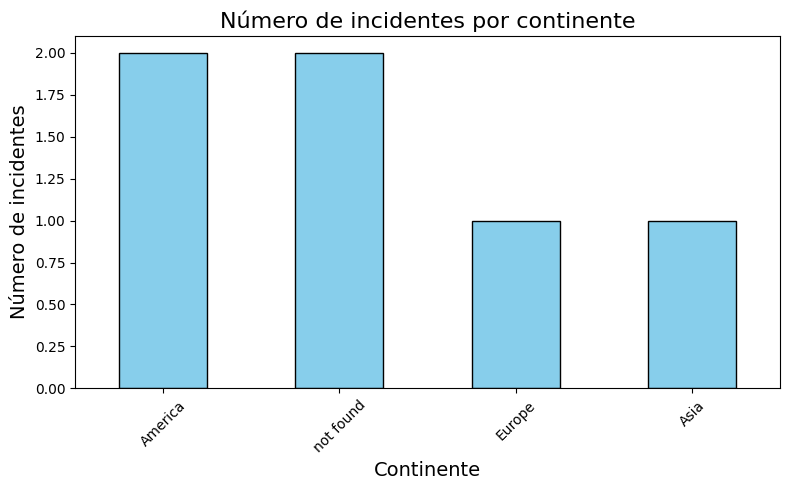


Primeras filas del DataFrame:
  locations continents
0       USA    America
1   Germany     Europe
2     India       Asia
3    Brazil    America
4       N/A  not found


N/A not found in ISO3
Unknown Country not found in regex



Primeras filas del DataFrame:
  locations continents
0       USA    America
1   Germany     Europe
2     India       Asia
3    Brazil    America
4       N/A  not found

Columna 'locations' actualizada:
  locations
0       USA
1   Germany
2     India
3    Brazil
4       N/A

Columna 'continents' actualizada:
  continents
0    America
1     Europe
2       Asia
3    America
4  not found

Primeras filas del DataFrame con 'locations' y 'continents':
  locations continents
0       USA    America
1   Germany     Europe
2     India       Asia
3    Brazil    America
4       N/A  not found

Columna 'locations' actualizada:
  locations
0       USA
1   Germany
2     India
3    Brazil
4       N/A

Columna 'continents' actualizada:
  continents
0    America
1     Europe
2       Asia
3    America
4  not found

Primeras filas del DataFrame con 'locations' y 'continents':
  locations continents
0       USA    America
1   Germany     Europe
2     India       Asia
3    Brazil    America
4       N/A  not

In [17]:

# Paso 4: Limpiar la columna 'locations' y procesar valores nulos
# Reemplazar valores nulos o vacíos con 'N/A'
df['locations'] = df['locations'].fillna("N/A")

# Quitar caracteres '[' y ']', y convertir cadenas de texto en un formato más limpio (sin corchetes ni comillas)
def clean_locations(location_string):
    if location_string == "N/A":
        return "N/A"  # Si es 'N/A', devolver 'N/A'
    # Eliminar los corchetes y las comillas, y separar por coma
    cleaned_string = location_string.strip("[]").replace("'", "")
    return cleaned_string  # Devolver la cadena limpia

# Aplicar la limpieza a la columna 'locations'
df['locations'] = df['locations'].apply(clean_locations)

# Función para convertir país a continente
def map_country_to_continent(country):
    try:
        return coco.convert(names=country, to='continent')
    except:
        return "Unknown"

# DataFrame de ejemplo
data = {"locations": ["USA", "Germany", "India", "Brazil", "N/A", "Unknown Country"]}
df = pd.DataFrame(data)

# Aplicar la función para mapear países a continentes
df['continents'] = df['locations'].apply(map_country_to_continent)

# Visualización: contar incidentes por continente
continent_counts = df['continents'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
continent_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de incidentes por continente', fontsize=16)
plt.xlabel('Continente', fontsize=14)
plt.ylabel('Número de incidentes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())
# Crear la columna 'continents' usando la conversión de país a continente
df['continents'] = df['locations'].apply(map_country_to_continent)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print("\nPrimeras filas del DataFrame:")
print(df[['locations', 'continents']].head())

# Asegurarse de que las columnas 'locations' y 'continents' estén presentes y en el formato correcto
if 'locations' in df.columns:
    print("\nColumna 'locations' actualizada:")
    print(df[['locations']].head())  # Mostrar solo las primeras filas de la columna 'locations'
else:
    print("La columna 'locations' no existe en el DataFrame.")

if 'continents' in df.columns:
    print("\nColumna 'continents' actualizada:")
    print(df[['continents']].head())  # Mostrar solo las primeras filas de la columna 'continents'
else:
    print("La columna 'continents' no existe en el DataFrame.")

# Si todo está bien, mostrar las primeras filas del DataFrame con las columnas 'locations' y 'continents'
print("\nPrimeras filas del DataFrame con 'locations' y 'continents':")
print(df[['locations', 'continents']].head())  # Mostrar ambas columnas juntas

# Asegurarse de que las columnas 'locations' y 'continents' estén presentes y en el formato correcto
if 'locations' in df.columns:
    print("\nColumna 'locations' actualizada:")
    print(df[['locations']].head())  # Mostrar solo las primeras filas de la columna 'locations'
else:
    print("La columna 'locations' no existe en el DataFrame.")

if 'continents' in df.columns:
    print("\nColumna 'continents' actualizada:")
    print(df[['continents']].head())  # Mostrar solo las primeras filas de la columna 'continents'
else:
    print("La columna 'continents' no existe en el DataFrame.")

# Si todo está bien, mostrar las primeras filas del DataFrame con las columnas 'locations' y 'continents'
print("\nPrimeras filas del DataFrame con 'locations' y 'continents':")
print(df[['locations', 'continents']].head())  # Mostrar ambas columnas juntas

In [18]:
# Función para limpiar la columna 'estimated_cost'
def clean_estimated_cost(cost_string):
    if pd.isna(cost_string):
        return "N/A"

    # Asegurarse de que el valor sea un string
    cost_string = str(cost_string).strip()

    # Filtrar valores conocidos no válidos
    if any(word in cost_string.lower() for word in ['no cost values disclosed', 'unknown', 'unsure']):
        return "N/A"

    if re.search(r'\d+\+?\s*(days|hours|minutes|seconds|weeks)', cost_string.lower()):
        return "N/A"

    # Detectar valores con "$<número><M o K>"
    match = re.search(r'\$\s*(\d+(?:[.,]\d{1,2})?)(\s?[KkMm]?)', cost_string)
    if match:
        number = match.group(1).replace(',', '')
        unit = match.group(2).upper().strip()

        try:
            number = float(number)
        except ValueError:
            return "N/A"

        if unit == 'M':
            return number * 1_000_000
        elif unit == 'K':
            return number * 1_000
        else:
            return number

    # Detectar rangos, por ejemplo: $18 - $20 million
    match_range = re.search(r'\$\s*(\d+(?:[.,]\d{1,2})?)\s*[-to]+\s*(\d+(?:[.,]\d{1,2})?)\s*(million|M|K|k)?', cost_string)
    if match_range:
        low_value = match_range.group(1).replace(',', '')
        high_value = match_range.group(2).replace(',', '')
        unit = match_range.group(3).upper() if match_range.group(3) else None

        try:
            low_value = float(low_value)
            high_value = float(high_value)
        except ValueError:
            return "N/A"

        if unit in ['M', 'million']:
            low_value *= 1_000_000
            high_value *= 1_000_000
        elif unit in ['K', 'k']:
            low_value *= 1_000
            high_value *= 1_000

        return f"{int(low_value)}-{int(high_value)}"

    # Si no se encuentra ningún valor numérico válido, retornar N/A
    return "N/A"

# Categorizar valores de costo estimado
def categorize_estimated_cost(value):
    if value == "N/A" or pd.isna(value):
        return "Unknown"

    try:
        if isinstance(value, float):
            cost_value = value
        elif isinstance(value, str) and '-' in value:
            low, high = map(float, value.split('-'))
            cost_value = (low + high) / 2
        else:
            cost_value = float(value)
    except ValueError:
        return "Unknown"

    if cost_value < 100_000:
        return "Low"
    elif 100_000 <= cost_value < 1_000_000:
        return "Medium"
    elif 1_000_000 <= cost_value < 10_000_000:
        return "High"
    else:
        return "Very High"

# Cargar el archivo CSV (reemplaza con la ruta correcta si es necesario)
df = pd.read_csv('ICSSTRIVE.csv')  # Cargar el archivo CSV

# Comprobar si la columna 'estimated_cost' existe en el DataFrame
if 'estimated_cost' in df.columns:
    # Limpiar la columna 'estimated_cost'
    df['estimated_cost'] = df['estimated_cost'].apply(clean_estimated_cost)
    print("\nColumna 'estimated_cost' modificada:")
    print(df[['estimated_cost']].head(67))

    # Aplicar la categorización a la columna 'estimated_cost'
    df['cost_category'] = df['estimated_cost'].apply(categorize_estimated_cost)
    print("\nColumna 'cost_category' modificada:")
    print(df[['estimated_cost', 'cost_category']].head(67))
else:
    print("La columna 'estimated_cost' no existe en el DataFrame.")



Columna 'estimated_cost' modificada:
   estimated_cost
0             N/A
1             N/A
2             N/A
3             N/A
4             N/A
..            ...
62            N/A
63            N/A
64            N/A
65      1500000.0
66            N/A

[67 rows x 1 columns]

Columna 'cost_category' modificada:
   estimated_cost cost_category
0             N/A       Unknown
1             N/A       Unknown
2             N/A       Unknown
3             N/A       Unknown
4             N/A       Unknown
..            ...           ...
62            N/A       Unknown
63            N/A       Unknown
64            N/A       Unknown
65      1500000.0          High
66            N/A       Unknown

[67 rows x 2 columns]


In [19]:
import pandas as pd

# Función para limpiar la columna 'victims' y categorizar
def clean_victims(victim_string):
    if pd.isna(victim_string):
        return "N/A"

    try:
        # Convertir la cadena en una lista de diccionarios
        victim_list = eval(victim_string)
        victim_names = [victim['title'] for victim in victim_list if 'title' in victim]

        # Categorizar las víctimas según patrones
        categorized_victims = categorize_victims(victim_names)
        return ', '.join(categorized_victims) if categorized_victims else "N/A"
    except Exception:
        return "N/A"

# Función para categorizar las víctimas según patrones comunes
def categorize_victims(victim_names):
    categories = []

    for name in victim_names:
        if 'Group' in name or 'Inc.' in name:
            categories.append('Corporation/Group')
        elif 'Corporation' in name:
            categories.append('Corporation')
        elif 'Company' in name:
            categories.append('Company')
        else:
            categories.append('Other')

    return list(set(categories))


# Cargar el archivo CSV (reemplaza con la ruta correcta si es necesario)
df = pd.read_csv('ICSSTRIVE.csv')  # Cargar el archivo CSV

# Verificar si la columna 'victims' existe en el DataFrame antes de procesar
if 'victims' in df.columns:
    # Limpiar y categorizar la columna 'victims'
    df['victims'] = df['victims'].apply(clean_victims)
    print("\nColumna 'victims' modificada:")
    print(df[['victims']].head(20))
else:
    print("La columna 'victims' no existe en el DataFrame.")



Columna 'victims' modificada:
              victims
0   Corporation/Group
1               Other
2         Corporation
3               Other
4               Other
5               Other
6               Other
7               Other
8               Other
9               Other
10              Other
11  Corporation/Group
12              Other
13              Other
14            Company
15              Other
16              Other
17              Other
18              Other
19  Corporation/Group


In [20]:
import pandas as pd
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder

# Función para limpiar la columna 'type_of_malware'
def clean_type_of_malware(malware_string):
    if pd.isna(malware_string):
        return "N/A", "N/A"  # Devuelve "N/A" si es un valor nulo

    if "No Malware identified" in malware_string:
        return "No Malware Identified", "N/A"

    try:
        # Evaluar el string para convertirlo en una lista de diccionarios
        malware_list = eval(malware_string)
        malware_names = []
        malware_links = []

        # Iterar sobre los elementos de la lista
        for malware in malware_list:
            if 'title' in malware:
                title = malware['title']

                # Verificar si contiene "unknown" (mayúsculas o minúsculas)
                if 'unknown' in title.lower():
                    title = 'Unknown'  # Reemplazar por "Unknown"

                malware_names.append(title)

            # Extraer el link URL del malware si existe
            if 'link_url' in malware:
                link_url = malware['link_url']
                domain = extract_domain(link_url)
                malware_links.append(domain)

        return (
            ', '.join(malware_names) if malware_names else "N/A",
            ', '.join(malware_links) if malware_links else "N/A"
        )

    except Exception:
        return "N/A", "N/A"  # Devuelve "N/A" si ocurre algún error

# Función para extraer el dominio de una URL
def extract_domain(url):
    try:
        parsed_url = urlparse(url)
        return parsed_url.netloc
    except Exception:
        return "N/A"  # Devuelve "N/A" si ocurre algún error

# Limpiar la columna 'type_of_malware' y crear nuevas columnas
if 'type_of_malware' in df.columns:
    df[['Malware title', 'Malware link URL']] = df['type_of_malware'].apply(
        lambda x: pd.Series(clean_type_of_malware(x))
    )
else:
    print("La columna 'type_of_malware' no existe en el DataFrame.")
    exit()

# Codificar las categorías de 'Malware title' usando LabelEncoder
label_encoder = LabelEncoder()
df['Malware title Encoded'] = label_encoder.fit_transform(df['Malware title'].fillna('Unknown'))

# Ver las primeras filas del DataFrame con las nuevas columnas
print("\nPrimeras filas del DataFrame con nuevas columnas:")
print(df[['Malware title', 'Malware link URL', 'Malware title Encoded']].head(20))



Primeras filas del DataFrame con nuevas columnas:
            Malware title Malware link URL  Malware title Encoded
0   No Malware Identified              N/A                     27
1   No Malware Identified              N/A                     27
2   No Malware Identified              N/A                     27
3   No Malware Identified              N/A                     27
4   No Malware Identified              N/A                     27
5   No Malware Identified              N/A                     27
6   No Malware Identified              N/A                     27
7   No Malware Identified              N/A                     27
8   No Malware Identified              N/A                     27
9   No Malware Identified              N/A                     27
10  No Malware Identified              N/A                     27
11  No Malware Identified              N/A                     27
12  No Malware Identified              N/A                     27
13  No Malware Identified

In [21]:
# Función para limpiar la columna 'threat_source'
def clean_threat_source(threat_source_string):
    if pd.isna(threat_source_string):
        return "N/A", "N/A"  # Devuelve "N/A" si es un valor nulo

    if "No threat source identified" in threat_source_string:
        return "No threat source identified", "N/A"

    try:
        # Evaluar el string para convertirlo en una lista de diccionarios
        threat_list = eval(threat_source_string)
        threat_titles = []
        threat_links = []

        # Iterar sobre los elementos de la lista
        for threat in threat_list:
            if 'title' in threat:
                title = threat['title']

                # Verificar si contiene "unknown" (mayúsculas o minúsculas)
                if 'unknown' in title.lower():
                    title = 'Unknown'  # Reemplazar por "Unknown"

                threat_titles.append(title)

            # Extraer el link URL del threat source si existe
            if 'link_url' in threat:
                link_url = threat['link_url']
                domain = extract_domain(link_url)
                threat_links.append(domain)

        return (
            ', '.join(threat_titles) if threat_titles else "N/A",
            ', '.join(threat_links) if threat_links else "N/A"
        )

    except Exception:
        return "N/A", "N/A"  # Devuelve "N/A" si ocurre algún error

# Función para extraer el dominio de una URL
def extract_domain(url):
    try:
        parsed_url = urlparse(url)
        return parsed_url.netloc
    except Exception:
        return "N/A"  # Devuelve "N/A" si ocurre algún error


# Limpiar la columna 'threat_source' y crear nuevas columnas
if 'threat_source' in df.columns:
    df[['Threat source title', 'Threat source link URL']] = df['threat_source'].apply(
        lambda x: pd.Series(clean_threat_source(x))
    )
else:
    print("La columna 'threat_source' no existe en el DataFrame.")
    exit()

# Codificar las categorías de 'Threat source title' usando LabelEncoder
label_encoder = LabelEncoder()
df['Threat source title Encoded'] = label_encoder.fit_transform(df['Threat source title'].fillna('Unknown'))

# Ver las primeras filas del DataFrame con las nuevas columnas
print("\nPrimeras filas del DataFrame con nuevas columnas:")
print(df[['Threat source title', 'Threat source link URL', 'Threat source title Encoded']].head(20))



Primeras filas del DataFrame con nuevas columnas:
            Threat source title Threat source link URL  \
0                     BlackByte          icsstrive.com   
1   No threat source identified                    N/A   
2   No threat source identified                    N/A   
3   No threat source identified                    N/A   
4                  Volt Typhoon          icsstrive.com   
5                       LockBit          icsstrive.com   
6                Cyber Av3ngers          icsstrive.com   
7         Akira Ransomware Gang          icsstrive.com   
8   No threat source identified                    N/A   
9         Hunters International          icsstrive.com   
10               Cyber Av3ngers          icsstrive.com   
11        Akira Ransomware Gang          icsstrive.com   
12               Cyber Av3ngers          icsstrive.com   
13  No threat source identified                    N/A   
14          Play, aka PlayCrypt          icsstrive.com   
15  No threat source 

In [22]:
# Función para limpiar la columna 'industries'
def clean_industries(industries_string):
    if pd.isna(industries_string) or industries_string == "[]":
        return "N/A"  # Si está vacío o es una lista vacía, devolver "N/A"

    try:
        # Evaluar el string para convertirlo en una lista
        industries_list = eval(industries_string)

        # Si la lista tiene elementos, devolver el primer elemento o todos
        if industries_list:
            return ', '.join(industries_list)
        else:
            return "N/A"
    except Exception:
        return "N/A"  # Si ocurre un error, devolver "N/A"

# Asignación de categorías a números (Label Encoding)
category_mapping = {
    "Manufacturing": 0,
    "Technology": 1,
    "Healthcare": 2,
    "Transportation and Logistics": 3,
    "Energy and Utilities": 4,
    "Government and Defense": 5,
    "Business Services": 6,
    "Public Sector and Non-Profit": 7,
    "Finance": 8
}

# Función para agrupar las industrias en categorías
def group_industries(industries_string):
    # Listas de industrias asociadas a cada categoría
    manufacturing = ["Aerospace", "Automotive", "Chemicals", "Metals and Mining", "Steel", "Food and Beverage", "Pulp and Paper", "Manufacturing"]
    technology = ["Software", "Cloud Provider", "Communications", "Technology"]
    healthcare = ["Biotech", "Pharmaceutical", "Healthcare"]
    transportation = ["Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking"]
    energy = ["Oil and Gas", "Water and Waste Water"]
    government_defense = ["Government", "Defense"]
    business_services = ["Business"]
    public_sector = ["Other"]
    finance = ["Banking", "Insurance"]

    # Convertir la cadena a lista
    industries_list = industries_string.split(', ')

    # Asignar categorías basadas en la industria
    if any(industry in industries_list for industry in manufacturing):
        return "Manufacturing"
    elif any(industry in industries_list for industry in technology):
        return "Technology"
    elif any(industry in industries_list for industry in healthcare):
        return "Healthcare"
    elif any(industry in industries_list for industry in transportation):
        return "Transportation and Logistics"
    elif any(industry in industries_list for industry in energy):
        return "Energy and Utilities"
    elif any(industry in industries_list for industry in government_defense):
        return "Government and Defense"
    elif any(industry in industries_list for industry in business_services):
        return "Business Services"
    elif any(industry in industries_list for industry in public_sector):
        return "Public Sector and Non-Profit"
    elif any(industry in industries_list for industry in finance):
        return "Finance"
    else:
        return "Other"  # Para casos no definidos


# Limpiar y procesar la columna 'industries'
if 'industries' in df.columns:
    # Limpiar la columna 'industries'
    df['industries'] = df['industries'].apply(clean_industries)

    # Agrupar las industrias en categorías
    df['industries_grouped'] = df['industries'].apply(group_industries)

    # Aplicar Label Encoding a 'industries_grouped'
    le = LabelEncoder()
    df['industries_encoded'] = le.fit_transform(df['industries_grouped'])

    # Mostrar las primeras filas del DataFrame procesado
    print("\nDataFrame con columnas relacionadas a 'industries':")
    print(df[['industries', 'industries_grouped', 'industries_encoded']].head(20))
else:
    print("La columna 'industries' no existe en el DataFrame.")



DataFrame con columnas relacionadas a 'industries':
                                           industries      industries_grouped  \
0                           Automotive, Manufacturing           Manufacturing   
1                                          Technology              Technology   
2                                       Manufacturing           Manufacturing   
3                                          Automotive           Manufacturing   
4                    Oil & Gas, Water and Waste Water    Energy and Utilities   
5                               Water and Waste Water    Energy and Utilities   
6                               Water and Waste Water    Energy and Utilities   
7   Energy (Includes Power and Utilities), Water a...    Energy and Utilities   
8                                   Automotive, Other           Manufacturing   
9   Transportation (Includes Logistics, Shipping, ...                   Other   
10                              Water and Waste Water   

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Función para limpiar la columna 'impacts'
def clean_impacts(impacts_string):
    if pd.isna(impacts_string) or impacts_string == "null":
        return "N/A"  # Si está vacío o es null, devolver "N/A"

    try:
        # Evaluar el string para convertirlo en una lista (si es necesario)
        impacts_list = impacts_string.split(', ') if isinstance(impacts_string, str) else []

        # Si la lista tiene elementos, devolverlos
        if impacts_list:
            return ', '.join(impacts_list)
        else:
            return "N/A"  # Si la lista está vacía, devolver "N/A"
    except Exception:
        return "N/A"  # Si ocurre un error, devolver "N/A"

# Asignación de categorías para 'impacts'
impact_category_mapping = {
    "IT": ["IT", "IT Privacy", "IT Safety", "IT Safety Privacy", "OT IT"],
    "OT": ["OT", "OT Privacy"],
    "Privacy": ["Privacy"]
}

# Función para agrupar impactos en categorías generales
def group_impacts(impacts_string):
    impacts_list = impacts_string.split(', ')  # Convertir la cadena en lista

    # Asignar las categorías basadas en las palabras clave
    for category, keywords in impact_category_mapping.items():
        if any(keyword in impacts_list for keyword in keywords):
            return category
    return "Other"  # Para casos no definidos


# Limpiar y procesar la columna 'impacts'
if 'impacts' in df.columns:
    # Limpiar la columna 'impacts'
    df['impacts'] = df['impacts'].apply(clean_impacts)

    # Agrupar los impactos en categorías
    df['impacts_grouped'] = df['impacts'].apply(group_impacts)

    # Aplicar Label Encoding a 'impacts_grouped'
    le = LabelEncoder()
    df['impacts_encoded'] = le.fit_transform(df['impacts_grouped'])

    # Mostrar las primeras filas del DataFrame procesado
    print("\nDataFrame con columnas relacionadas a 'impacts':")
    print(df[['impacts', 'impacts_grouped', 'impacts_encoded']].head(20))
else:
    print("La columna 'impacts' no existe en el DataFrame.")



DataFrame con columnas relacionadas a 'impacts':
       impacts impacts_grouped  impacts_encoded
0        OT IT              IT                0
1           IT              IT                0
2           IT              IT                0
3   IT Privacy              IT                0
4           IT              IT                0
5           IT              IT                0
6           IT              IT                0
7   IT Privacy              IT                0
8   IT Privacy              IT                0
9           IT              IT                0
10          IT              IT                0
11  IT Privacy              IT                0
12       OT IT              IT                0
13          IT              IT                0
14          IT              IT                0
15          IT              IT                0
16          IT              IT                0
17         N/A           Other                2
18       OT IT              IT        

In [24]:
# Función para extraer solo la URL de 'link_url' en 'references'
def extract_url_from_references(references):
    try:
        # Si 'references' está vacío o es nulo, devuelve N/A
        if pd.isna(references):
            return "N/A"

        # Evaluar el string para convertirlo en una lista de diccionarios
        references_list = eval(references)

        # Extraer solo la URL (link_url) de cada entrada en la lista de diccionarios
        urls = [entry['link_url'] for entry in references_list if 'link_url' in entry]

        # Si existen URLs, devolver la primera (o cualquier otra lógica que prefieras)
        return urls[0] if urls else "N/A"
    except Exception:
        return "N/A"  # Si ocurre un error, devolver "N/A"


# Limpiar la columna 'references' y extraer la URL
if 'references' in df.columns:
    df['references'] = df['references'].apply(extract_url_from_references)

    # Verificar el resultado final mostrando solo la columna 'references'
    print("\nColumna 'references' actualizada:")
    print(df[['references']].head())  # Mostrar solo las primeras filas de la columna 'references'
else:
    print("La columna 'references' no existe en el DataFrame.")



Columna 'references' actualizada:
                                          references
0  https://www.csidb.net/csidb/incidents/e7098fd4...
1  https://www.securityweek.com/laptop-maker-fram...
2  https://www.isssource.com/clothing-brand-v-f-c...
3  https://www.bleepingcomputer.com/news/security...
4  https://interestingengineering.com/culture/chi...


In [25]:
import hashlib
import pandas as pd

# Función para generar un ID único basado en la URL y el índice de la fila
def generate_unique_id_from_url_and_index(url, index):
    try:
        # Verificar si la URL es válida
        if pd.isna(url):
            return "N/A"  # Si es NaN o no se encuentra URL, retornar "N/A"

        # Generar un hash MD5 de la URL
        url_hash = hashlib.md5(url.encode()).hexdigest()

        # Combinar el hash de la URL con el índice de la fila (para hacer cada ID único)
        unique_id = hashlib.md5(f"{url_hash}{index}".encode()).hexdigest()[:8]  # Usamos los primeros 8 caracteres del hash

        return unique_id
    except Exception as e:
        print(f"Error al generar el ID único: {e}")
        return "N/A"  # Si ocurre un error, devolver "N/A"


# Asegúrate de que la columna 'data_source_link_url' exista
if 'data_source_link_url' in df.columns:
    # Aplicar la función para generar un ID único en la columna 'data_source_link_url' usando el índice de la fila
    df['data_source_id'] = df.apply(lambda row: generate_unique_id_from_url_and_index(row['data_source_link_url'], row.name), axis=1)

    # Ver el resultado con la nueva columna 'data_source_id' como clave primaria
    print("\nDataFrame con la nueva columna 'data_source_id':")
    print(df[['data_source_link_url', 'data_source_id']].head())  # Mostrar las primeras filas para verificar la salida
else:
    print("La columna 'data_source_link_url' no existe en el DataFrame.")



DataFrame con la nueva columna 'data_source_id':
                                data_source_link_url data_source_id
0  https://icsstrive.com/incident/operational-imp...       7f88f2d6
1  https://icsstrive.com/incident/framework-lapto...       257ad142
2  https://icsstrive.com/incident/clothing-provid...       c9cc1e11
3  https://icsstrive.com/incident/hackers-accesse...       b3566874
4  https://icsstrive.com/incident/chinese-identif...       9732b25a
